# Web Crawler

Collect text data from the PTT forum, process the article texts, and finally create a word cloud for a quick overview of the topics in these collected texts.

## Crawling Data from PTT

In [1]:
import requests
from bs4 import BeautifulSoup as soup  # HTML data structure
from lxml import etree


# extract article hyperlinks from an index page
def extractArtLinks(url):
    r = requests.get(url, cookies={'over18': '1'})
    page_soup = soup(r.text, "html.parser")
    containers = page_soup.findAll("div", {"class": "r-ent"})
    art_links = []
    for container in containers:
        # Finds all link tags "a" from within the first div.
        art_link = container.find('a')
        if art_link:
            #print(art_link['href'])
            #print(container.find('div',{'class':'title'}).get_text())
            art_meta = container.find('div', {'class': 'meta'})
            #print(art_meta.find('div',{'class':'author'}).get_text())
            #print(art_meta.find('div',{'class':'date'}).get_text())

            art_links.append({
                'push':
                container.find('div', {
                    'class': 'nrec'
                }).get_text(),
                'title':
                container.find('div', {
                    'class': 'title'
                }).get_text().strip(),
                'date':
                art_meta.find('div', {
                    'class': 'date'
                }).get_text(),
                'author':
                art_meta.find('div', {
                    'class': 'author'
                }).get_text(),
                'link':
                art_link['href'],
                'text':
                extractArtText('https://www.ptt.cc' + art_link['href'])
            })

    return (art_links)


# find the previous index page link
def findPrevIndex(url):
    r = requests.get(url, cookies={'over18': '1'})
    page_soup = soup(r.text, "html.parser")
    btn = page_soup.select('div.btn-group > a')
    up_page_href = btn[3]['href']
    next_page_url = 'https://www.ptt.cc' + up_page_href
    return (next_page_url)


# extract article contents from  the article hyperlink
def extractArtText(url):
    r = requests.get(url, cookies={'over18': '1'})
    #page_soup = soup(r.text, "lxml")
    #print(page_soup.find("div",{"id":"main-content"}).get_text())
    #art_text=page_soup.select('div#main-content', limit=1)[0].text
    content = r.content.decode()
    html = etree.HTML(content)
    art_text = html.xpath(
        "//div[@id='main-content']/text()[not(self::div|self::span[@class='f2'])]"
    )
    return ''.join(list(art_text))

In [2]:
## Debug Use

# url = 'https://www.ptt.cc/bbs/Food/M.1602332821.A.6F3.html'
# r = requests.get(url, cookies={'over18': '1'})
# #page_soup = soup(r.text, "lxml")
# #print(page_soup.find("div",{"id":"main-content"}).get_text())
# #art_text=page_soup.select('div#main-content', limit=1)[0].text
# content = r.content.decode()
# html = etree.HTML(content)
# art_text = html.xpath(
#     "//div[@id='main-content']/text()[not(self::div|self::span[@class='f2'])]")

# print(''.join(list(art_text)))

```{note}
For CSS selector, don't know how to set conditional criteria to select only texts under div#main-container but not those included in the child div.article-metaline and span.f2.

So here I use the XPath, which requires the lxml package.
```

In [3]:
# main()
num_of_index_page = 5
board_name = 'Food'
url = 'https://www.ptt.cc/bbs/{}/index.html'.format(board_name)
all_links = []
for page in range(1, num_of_index_page):
    all_links = all_links + extractArtLinks(url)
    url = findPrevIndex(url)
len(all_links)

73

In [4]:
type(all_links[2])
print(all_links[2])

{'push': '', 'title': '[食記] 坂里無名早餐 馬祖北竿 超好吃油飯加蛋!', 'date': '10/22', 'author': 'Geiwoyujie', 'link': '/bbs/Food/M.1603379826.A.1C3.html', 'text': '\n   餐廳名稱：坂里無名早餐店\n   消費時間：2020年/7月\n   地址：台灣馬祖北竿鄉27-1號\n   電話：+886 937 181 593\n   營業時間：06:30 - 11:00\n   每人平均價位：105 TWD\n   可否刷卡：否\n   有無包廂：無\n   推薦菜色：油飯加蛋\n   官網：無\n\n圖多Blog好讀版:\nEnglish: \n中文: \n\n2020年7月20日，這天早上和朋友從台灣馬祖南竿福澳港搭船\n前往馬祖的北竿的白沙碼頭\n在借好了摩托車以後\n我們前往碼頭附近的坂里無名早餐店\n\n坂里無名早餐店位於北竿遊客中心的旁邊\n對面則是古蹟坂里大宅\n\n這裡室內和室外都有位子\n不過夏天的馬祖很熱\n加上店裡面沒有空調\n所以我們選擇通風比較良好的室外座位\n\n我點了一份蔥蛋火腿馬祖漢堡，40 TWD (= 1.39 USD)\n以及一碗餛飩魚丸湯，70 TWD (= 2.44 USD)\n\n而朋友則是點了一盤油飯加蛋，40 TWD (= 1.39 USD)\n以及一杯大杯冰豆漿，20 TWD (= 0.7 USD)\n\n朋友點的油飯加蛋率先送上\n因為看起來非常可口誘人\n令我後來忍不住再花40 TWD (= 1.39 USD)\n也加點了油飯加蛋！\n\n\n而我先試試這個蔥蛋火腿馬祖漢堡\n外面的漢堡麵包是馬祖特產，繼光餅\n吃起來相當紮實有嚼勁！\n\n裡面夾上的是火腿和蔥蛋\n還有撒一點胡椒\n和紮實的繼光餅搭配起來\n吃起來特別的香且美味！\n\n\n而餛飩魚丸湯的部份\n則有加入了醋\n有一點酸酸的味道\n在夏天喝起來意外滿開胃的\n\n魚丸的尺寸小小一個\n吃起來口感略帶有點彈性\n\n而這裡的餛飩也小小一個\n此外皮也非常的薄\n吃起來有一種入口即化的感覺！\n\n\n最後則是我額外加點的油飯加蛋\n這裡的油飯飯的口感Q彈\n吃起來不會太軟爛\n是我個人非常喜歡的口感\n\n油飯淋上一點甜辣醬

In [5]:
print('Push: {push:s} \n'
      'title: {title:s} \n'
      'date: {date:s} \n'
      'author: {author:s} \n'
      'link: {link:s} \n'
      'text: {text:.20} \n'.format(**all_links[3]))

Push:  
title: [食記] 台北松山寶清街 暮暮うどん烏龍麵 
date: 10/22 
author: TW00500203 
link: /bbs/Food/M.1603379860.A.9B0.html 
text: 
電話：02 2767 2771
地址： 



## Text Normalization

In [6]:
import sys
sys.path.insert(1, '../nlp')
import text_normalizer_zh as tn

In [7]:
print(all_links[3]['text'])


電話：02 2767 2771
地址：台北市松山區寶清街71號
營業時間：17:00-23:00
消費時間：2020年10月
每人平均價位：200~350
服務費：無
外送： UBEREATS
其他支付：街口
------------------------

圖文網誌好讀版本:

------------------------
暮暮うどん烏龍麵其實我們也是老主顧了，還介紹給很多朋友這家日式小夜食堂，起初是
想吃大高冰花煎餃，不過那天正好沒開，就走過巷子改吃烏龍，一吃後就成主顧。






位置在小紅莓正對面，大門擺飾就蠻日式風情元素。



酒後不開車，安全有保障。



飲酒過量，害人害己。

店內如同日式居酒屋小食堂般，僅吧台位加上4人方桌2張的座位，整間店大約10初頭的座
位其實不多。










店內有乾、湯的烏龍麵，也有飯類，不過我覺得他們的招牌是烏龍所以每次都來點烏龍。



記得打卡可以送溫泉蛋喔，這次傻呼呼的忘記這回事了，之前吃過有點柴魚的香，冰冰涼
涼配麵配飯都好吃。


冰箱內也有很有趣的日本汽水，像是冰淇淋、草莓、哈密瓜等等，喜歡這種日式汽水的朋
友千萬不能錯過。



店家也有提供熱麥茶，可自行取用在箭筒下。





等候了一會可以開飯拉！！！點了牛肉豆皮湯烏龍＋雞唐揚湯烏龍各一份。





【豆皮和牛湯烏龍麵(中) NT.240】
牛肉的部分也會先煎炒過，是帶點油花的肥牛，吃起來有些奶油味，個人覺得味道蠻香的
，不過會帶些筋，怕筋的話建議別選這道。


不知道從哪時開始吃這種清湯烏龍麵開始喜歡加豆皮了，這家的豆皮可能是我吃過最喜歡
的一家，蓬鬆蓬鬆的口感，但外頭確有老皮嫩肉的老皮觸感，透過甜甜的日式醬汁醃漬，
吃起來香甜配清湯烏龍超棒。



建議可以加些七味粉，這邊的有點微辣，加完更多層次感。




【唐揚雞肉烏龍(中) NT.200】
這份唐揚雞我覺得想吃CP值的話很適合，有一碗清湯烏龍，再配上6塊左右的唐揚雞腿塊
，炸雞有分開放不會濕濕DER，可以仔細品嘗湯底雞炸雞腿塊的鮮嫩。


剛剛牛肉烏龍時沒介紹湯麵本體，因為現在才要從原味湯烏龍與大家說起，麵條和原味湯
我覺得暮暮應該是南港松山一帶屬一屬二的，麵條雖然熱湯會比較不Q，但是暮暮的熱烏
龍麵條還是很Q彈。

寬度也比其他家來的粗的感覺，湯頭則是圓滑的柴魚高湯，

In [8]:
raw = [art['text'] for art in all_links if len(art) != 0 and len is not None]
raw_normalized = tn.normalize_corpus(raw)

Building prefix dict from /Users/Alvin/GoogleDrive/_MySyncDrive/RepositoryData/data/jiaba/dict.txt.jiebatw.txt ...


Loading model from cache /var/folders/n7/ltpzwx813c599nfxfb94s_640000gn/T/jieba.u1b52b47246a0f2e6497af6bbe107adac.cache


Loading model cost 0.948 seconds.


Prefix dict has been built successfully.


In [9]:
import pandas as pd

corpus_df = pd.DataFrame({"raw": raw, "normalized": raw_normalized})

In [10]:
corpus_df.head(2)

,raw,normalized
0,\n餐廳名稱：馨家小廚\n消費時間：2020年/7月\n電話：0937-821997\n地址...,餐廳 名稱 馨家 小廚 消費 時間 年 月 電話 地址 台東縣 長濱鄉 長濱 號 營業 時間...
1,\n 餐廳名稱：王朝鮮肉湯包\n 消費時間：2020年/10月\n 地址：桃園市...,餐廳 名稱 王朝 鮮肉 湯包 消費 時間 年 月 地址 桃園市 大溪區 永昌路 號 電話 營...


In [11]:
raw[5]

'\n\n   餐廳名稱：BEAN BARN 豆荒良倉\n   消費時間：2020/10\n   地址：台北市大同區雙連街49號\n   營業時間：10:00–18:00 (週一二公休)\n   每人平均價位：100-200\n   推薦菜色：精品咖啡布丁 莓果園磅蛋糕\n   官網：\n\n----------------------------------\n\n圖文食記：\n\n\n----------------------------------\n\n\n\n2020年9月才開幕的新店家，\n店主原本是烘豆師 (偷聽他跟其他客人聊天)，\n因此，前往店裡的客人，除了喝咖啡、吃甜點，\n有許多也為了Bean Barn的咖啡豆而去!\n\n\n【環境】\n店門口寬敞，並擺設戶外座椅，\n其中還連接著一張小桌子\n(許多IG美照都在這裡拍唷!哈哈)\n平日下午，人潮多到滿出來呀!\n\n門口擺放著老木櫃，半開的抽屜裡放滿小盆栽，\n超級可愛!!\n喜歡方盒造型的招牌，\n(招牌質感我個人很加分)\n\n\n內部一目了然的空間，\n6席吧檯坐位以及側邊2位置，\n其餘空間很寬敞，\n有咖啡豆選購區以及各種我不懂的設備，\n有一種咖啡工廠的錯覺~\n\n\n近年來蠻喜歡水泥牆面風格，\n配上一些質感的木質傢俱，\n很耐看!\n\n\n【餐點】\n菜單\n第一次看到這麼精巧可愛的菜單，\n掛在一旁好像晾衣服喔!\n\n\n精品咖啡布丁 NTD 120\n衣索比亞手沖咖啡+衣索比亞豆製成的布丁\n同一種咖啡豆，兩種完全不同的體驗，\n覺得很有創意!\n重點是，咖啡很好喝，\n有咖啡香氣十足的布丁好棒，\n軟綿口感搭上微苦糖漿! 喜歡~\n\n\n莓果園磅蛋糕 NTD 150\n非常緊實有重量，切下去後又立刻鬆軟!\n有恰好濕潤度甜度適中的好吃蛋糕!\n\n\n熱拿鐵 NTD 150\n很順口的拿鐵，\n搭配蛋糕也不失好喝的口感~\n\n\n我喜歡跟先生一起到處吃喝，\n但是一個人的時光我也同樣享受，\n習慣與自己相處，\n在自我放空時與自己對話，\n我認為是重要的事~\n\n\n--\n我們是阿呆夫妻過日子主要分享國內外旅遊、美食\n\n部落格：\nInstgram：\nFB粉專：\n\n--\n'

In [12]:
raw_normalized[4]

'餐廳 名稱 洪記 蒸餃 熱河 二店 消費 時間 年 月 店家 地址 高雄市 前金區 自立 一路 號 店家 電話 營業 時間 週四 公休 餐點 價位 小籠 湯包 七顆 元 可否 刷卡 不可以 有無 包廂 沒有 推薦 菜色 暫無 停車 地點 路邊 公有 停車場 鄰近 捷運 暫無 圖文 網誌 洪記 蒸餃 熱河 二店 開 在 自立 一路 與 八德 二路 的 交口 附近 停車 還滿 需要 看看 運氣 的 會 知道 這間 洪記 蒸餃 是 因為 之前 在 對面 買 果汁 的 時候 就 剛好 看到 這間 店 在 裝修 所以 就 想 說 之後 要來 吃吃 看 不過 在 地圖 一查 得到 的 名稱 是 洪記 蒸餃 熱河 二店 這一 點 確實 讓 人 覺得 怪怪 的 雖然 說 熱河 一街 中 也 有 一間 洪記 蒸餃 但是 這間 熱河 二店 根本 就 不 在 熱河 街上 啊 洪記 蒸餃 販售 的 東西 很 簡單 就 只有 四樣 分別 是 蒸餃 元 小籠 湯包 元 酸辣湯 大 元 小 元 玉米 濃湯 大 元 小 元 小籠 湯包 七顆 元 上 一次 寫 了 篇 元豪 湯包 的 食記 因為 七顆 小籠 湯包 只要 元 壽司 羊是 覺得 真的 還滿 便宜 的 所以 才 會 在 標題 上 打上 便宜 又 好吃 這幾個 字 結果 還是 有 人 認為 這樣 是 貴 的 所以 想 問問 各位 小籠 湯包 達人 請問 怎麼 才 算是 便宜 的 小籠 湯包 或是 這樣 說 在 哪裡 可以 吃到 好吃 又 很 便宜 的 湯包 請 不要 說 在 家裡 自己 做 壽司 羊 就是 沒有 這樣 的 技術 才 在 外面 吃 啊 洪記 蒸餃 的 小籠 湯包 外皮 看起來 還滿 完整 的 有 人 說 這麼 好看 一定 是 機器 做 的 手工 沒辦法 每一個 都 這麼 整齊 不過 就 手工 還是 機器 做 這一 點 壽司 羊並 沒有 去問 店家 但是 壽司 羊是 這樣 覺得 不管 是 手工 還是 機器 做 的 只要 好吃 那 其實 大家 應該 都 可以 接受 洪記 蒸餃 的 外皮 比較 一些 而元豪 的 外皮 則是 比較 薄嫩 一些 所以 在 夾的 時候 洪記 蒸餃 的 是 比較 不 容易 破 的 小籠 湯包 裏頭 的 湯汁 不算 多 不過 剛 蒸好 還是 很 燙 吃 的 時候 要 小心 不然 很 容易 被 燙到 內餡 的

- [Unicode List](https://en.wikipedia.org/wiki/List_of_Unicode_characters)
- [Unicode Categories](https://unicodebook.readthedocs.io/unicode.html)

In [13]:
text = raw[0]
text

'\n餐廳名稱：馨家小廚\n消費時間：2020年/7月\n電話：0937-821997\n地址：台東縣長濱鄉長濱100號\n營業時間：11:00~14:00   17:00~20:00  周二休\n\nblog圖文版：\n\n在長濱留宿一晚，長濱最熱鬧的就一條街，不過長濱這的餐廳也不少，蠻多家餐館都是主\n打無菜單料理，不過自己對無菜單料理興趣不大，畢竟出的菜不一定是自己喜歡的，所以\n就找到街上的馨家小廚，雖然只是一家小小的餐館，不過料理的多樣性，來這兒吃飯就對\n了。\n\n\nmenu，沒有紙本menu，當天的菜色都會用掛牌放上，價格也可能會不一樣，雖然不便宜，\n不過吃過後會覺得來這兒比去無菜單料理店值得。\n\n鮮甜大蝦，8隻肥美的蝦子，燙熟後再冰過，蝦殼輕輕鬆鬆就撥開，蝦肉Q彈好吃，還附上\n洛神花可以配著吃。\n\n菜頭湯，菜頭、玉米、排骨肉，湯頭甜美。\n\n私房鹹豬肉，馨家小廚自家醃製，上桌前再煎烤過，豬肉表皮微脆肉質軟嫩，鹹香的口感\n很棒，沾著附的蒜頭白醋吃還可以解油膩。\n\n香料椒麻雞，不得不說，這是我吃過最入味的椒麻雞，非常的麻，會讓頭皮狂冒汗的，問\n了老板，總共用了三種香料，又麻又香，雞肉是當天採購的溫體雞肉，肉質軟嫩好吃，真\n的是非常的配飯，也超適合配酒的。\n\n\n\n--\n\n            @__\n           _,>/-_   攝影‧旅行‧拈花惹草→Morris\n          (_) \\(_)________ \n\n\n--\n'

In [14]:
import unicodedata

result = ''.join(ch for ch in text
                 if unicodedata.category(ch)[0] not in ['P', 'S'])
result

'\n餐廳名稱馨家小廚\n消費時間2020年7月\n電話0937821997\n地址台東縣長濱鄉長濱100號\n營業時間11001400   17002000  周二休\n\nblog圖文版\n\n在長濱留宿一晚長濱最熱鬧的就一條街不過長濱這的餐廳也不少蠻多家餐館都是主\n打無菜單料理不過自己對無菜單料理興趣不大畢竟出的菜不一定是自己喜歡的所以\n就找到街上的馨家小廚雖然只是一家小小的餐館不過料理的多樣性來這兒吃飯就對\n了\n\n\nmenu沒有紙本menu當天的菜色都會用掛牌放上價格也可能會不一樣雖然不便宜\n不過吃過後會覺得來這兒比去無菜單料理店值得\n\n鮮甜大蝦8隻肥美的蝦子燙熟後再冰過蝦殼輕輕鬆鬆就撥開蝦肉Q彈好吃還附上\n洛神花可以配著吃\n\n菜頭湯菜頭玉米排骨肉湯頭甜美\n\n私房鹹豬肉馨家小廚自家醃製上桌前再煎烤過豬肉表皮微脆肉質軟嫩鹹香的口感\n很棒沾著附的蒜頭白醋吃還可以解油膩\n\n香料椒麻雞不得不說這是我吃過最入味的椒麻雞非常的麻會讓頭皮狂冒汗的問\n了老板總共用了三種香料又麻又香雞肉是當天採購的溫體雞肉肉質軟嫩好吃真\n的是非常的配飯也超適合配酒的\n\n\n\n\n\n            \n              攝影旅行拈花惹草Morris\n            \n\n\n\n'

## Word Cloud

In [15]:
from collections import Counter
import imageio
from nltk.tokenize import WhitespaceTokenizer
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt

In [16]:
## Check font paths
## !fc-list :lang=zh

ws = WhitespaceTokenizer()

tokens = [ws.tokenize(text) for text in raw_normalized]

In [17]:
from collections import Counter

# corpus token freq
tokens_freq = Counter(sum(tokens, []))
sorted(tokens_freq.items(), key=lambda x: x[1], reverse=True)

# corpus token freq per document
tokens_freq_per_doc = [Counter(wt) for wt in tokens]

# corpus token docfreq
tokens_df = Counter()

# map(tokens_df.update, (tfpd.keys() for tfpd in tokens_freq_per_doc))

for tfpd in tokens_freq_per_doc:
    tokens_df.update(tfpd.keys())

print(tokens_df)

Counter({'的': 73, '時間': 71, '是': 68, '也': 67, '有': 66, '地址': 65, '餐廳': 64, '營業': 64, '號': 63, '就': 62, '了': 62, '在': 61, '人': 61, '消費': 60, '都': 60, '年': 58, '很': 58, '月': 57, '電話': 57, '吃': 57, '名稱': 56, '上': 56, '我': 55, '來': 54, '不': 53, '口感': 52, '可以': 51, '會': 49, '但': 47, '喜歡': 45, '沒有': 45, '比較': 45, '圖文': 44, '好吃': 43, '讓': 43, '覺得': 42, '推薦': 42, '版': 41, '說': 40, '價位': 40, '到': 40, '後': 39, '再': 39, '味道': 39, '因為': 38, '跟': 38, '不錯': 38, '口味': 38, '一': 37, '要': 37, '就是': 37, '好': 37, '又': 36, '我們': 36, '吃起來': 36, '看': 36, '還有': 35, '不過': 34, '無': 33, '多': 33, '與': 33, '所以': 32, '搭配': 32, '和': 32, '不會': 32, '還是': 32, '菜色': 31, '非常': 31, '元': 31, '每人': 31, '想': 31, '店家': 31, '有點': 30, '菜單': 29, '自己': 29, '平均': 29, '很多': 29, '可': 29, '才': 29, '真的': 29, '以': 29, '去': 29, '包廂': 28, '店': 28, '時': 28, '除了': 28, '美食': 28, '如果': 28, '等': 28, '最': 27, '這裡': 27, '一個': 27, '而': 27, '選擇': 27, '一點': 27, '感覺': 27, '他': 27, '應該': 27, '餐點': 27, '用餐': 27, '價格': 26, '小': 26, '吃到': 26, '更': 26, 

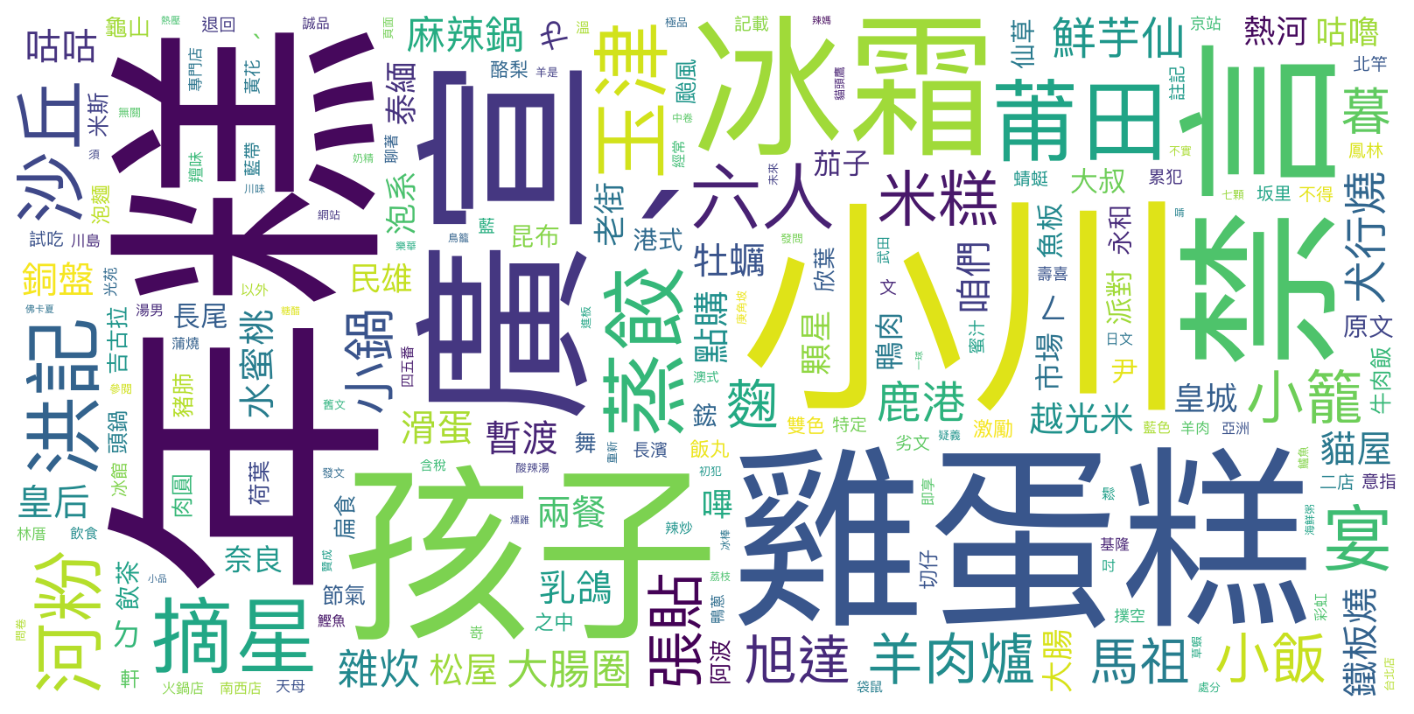

In [18]:
## Load stopwords
with open(
        '../../../RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt'
) as f:
    stopwords = [w.strip() for w in f.readlines()]

# Create stopwords ad hoc
stopwords = set([
    '文章', '食記', '水桶', '刪除', '投票', '刪文', '連結', '板面', '板主', '規定', '違規', '使用',
    '所以', '禁止', '天', '票'
])

# Cutoff based on docfreq and stopwords
words2plot = dict([(w, tokens_freq[w]) for w, df in tokens_df.items()
                   if df < 2 and w not in stopwords and tokens_freq[w] >= 2])

wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='white',
                      stopwords=stopwords,
                      width=1600,
                      height=800,
                      margin=20)
# wordcloud.generate(' '.join([w for w in tokens_unnest if w not in stopwords]))
wordcloud.generate_from_frequencies(words2plot)
plt.figure(figsize=(20, 10), facecolor='w')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=1)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')

:::{admonition} Exercise
How to seperate post texts from push texts?
:::
